In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import sys
from ultralytics import YOLO
import pickle
import matplotlib
# matplotlib.use('TkAgg')
# %matplotlib notebook
# %matplotlib inline
from functools import reduce

In [2]:
from fastsam import FastSAM, FastSAMPrompt

In [116]:
def fast_sam_segment(image):
    yolo = YOLO('yolov8n.pt')
    objects = yolo(image, save = False, classes=[15, 16])
    
    if len(objects[0].boxes.cls) > 0 and int(objects[0].boxes.cls[0]) in (15, 16):
        box = objects[0].boxes.data[0][:4].tolist()
        
        sam_model = FastSAM('FastSAM-x.pt')
        DEVICE = 'cpu'
        everything_results = sam_model(image, device=DEVICE, retina_masks=True, imgsz=1024, conf=0.4, iou=0.9,)
        prompt_process = FastSAMPrompt(image, everything_results, device=DEVICE)
        
        ann = prompt_process.box_prompt(bbox = box)
        result_tensor = reduce(torch.max, everything_results[0].masks.data)
        mask = result_tensor.cpu().numpy()
        plt.imshow(result_tensor)
        return mask

In [104]:
def fast_sam_cutout(image, mask):
    original_image = image
    mask = mask
    binary_mask = mask #mask is already in 0's and 1's so no need to convert

    original_image_rgba = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGBA) #to introduce

    # Apply the mask to the alpha channel to make non-mask parts transparent
    original_image_rgba[:, :, 3] = binary_mask * 255

    # Display the image
#     plt.imshow(original_image_rgba)
#     plt.axis('off')
#     plt.savefig('cat.png', transparent=True)
#     plt.show()
    return original_image_rgba



image 1/1 /Users/dipta/Documents/capstone/Model Training/raw-img/cat/16.jpeg: 480x640 3 cats, 41.0ms
Speed: 1.1ms preprocess, 41.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /Users/dipta/Documents/capstone/Model Training/raw-img/cat/16.jpeg: 768x1024 13 objects, 1281.4ms
Speed: 2.2ms preprocess, 1281.4ms inference, 2.3ms postprocess per image at shape (1, 3, 768, 1024)


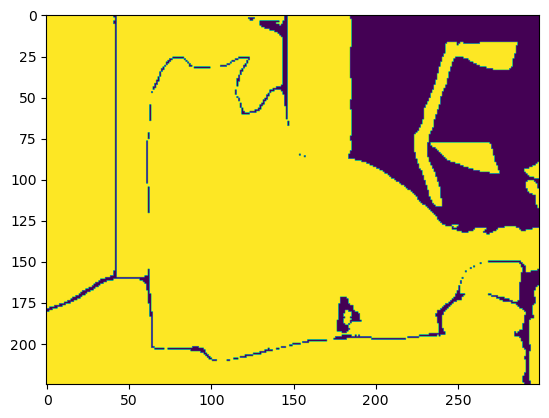

In [117]:
image = './raw-img/cat/16.jpeg'
mask = fast_sam_segment(image)


In [113]:
original_image = image

In [114]:
original_image_rgba = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGBA)

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [105]:
fast_sam_cutout('./raw-img/cat/5.jpeg', mask)

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [84]:
IMAGE_PATH = './raw-img/cat/5.jpeg'

In [85]:
yolo = YOLO('yolov8n.pt')

In [86]:
objects = yolo(IMAGE_PATH, save = False, classes=[15, 16])



image 1/1 /Users/dipta/Documents/capstone/Model Training/raw-img/cat/5.jpeg: 640x576 1 cat, 67.3ms
Speed: 3.8ms preprocess, 67.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 576)


In [87]:
box = objects[0].boxes.data[0][:4].tolist()

In [88]:
input_box = np.array(objects[0].boxes.data[0][:4].tolist())

In [89]:
objects[0].boxes.data[0][:4].tolist()

[20.665861129760742, 29.347599029541016, 215.3672637939453, 273.57867431640625]

In [90]:
sam_model = FastSAM('FastSAM-x.pt')
DEVICE = 'cpu'
everything_results = sam_model(IMAGE_PATH, device=DEVICE, retina_masks=True, imgsz=1024, conf=0.4, iou=0.9,)
prompt_process = FastSAMPrompt(IMAGE_PATH, everything_results, device=DEVICE)


image 1/1 /Users/dipta/Documents/capstone/Model Training/raw-img/cat/5.jpeg: 1024x896 3 objects, 1418.7ms
Speed: 2.5ms preprocess, 1418.7ms inference, 1.9ms postprocess per image at shape (1, 3, 1024, 896)


In [91]:
ann = prompt_process.box_prompt(bbox = box)

In [23]:
ann = prompt_process.everything_prompt()

In [149]:
pic = prompt_process.plot(ann)

In [51]:
result_tensor = torch.max(everything_results[0].masks.masks[0],everything_results[0].masks.masks[1])

WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.
WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.


In [92]:
from functools import reduce

In [93]:
result_tensor = reduce(torch.max, everything_results[0].masks.masks)

WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.


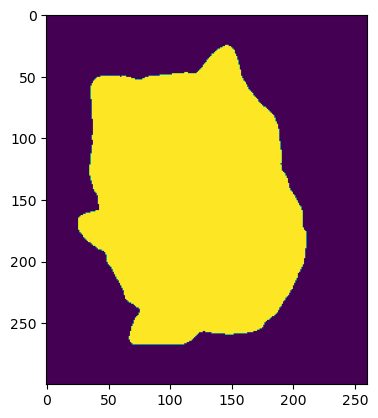

In [95]:
mask = result_tensor.cpu().numpy()
plt.imshow(result_tensor)

In [66]:
list(bbox)

[156.03692626953125, 57.01683807373047, 251.4964599609375, 132.7930908203125]

In [94]:
result_tensor

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [150]:
mask = everything_results[0].masks.masks[7].cpu().numpy()
plt.imshow(mask)

WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.


In [56]:
everything_results[0].masks

WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.


ultralytics.yolo.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
masks: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
 

In [66]:
everything_results[0].masks.masks[0].cpu().numpy()

WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.


array([[          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       ...,
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0]], dtype=float32)

In [31]:
prompt_process.fast_show_mask(ann, [0,0])

TypeError: sum() received an invalid combination of arguments - got (out=NoneType, axis=tuple, ), but expected one of:
 * (*, torch.dtype dtype)
      didn't match because some of the keywords were incorrect: out, axis
 * (tuple of ints dim, bool keepdim, *, torch.dtype dtype)
 * (tuple of names dim, bool keepdim, *, torch.dtype dtype)


In [151]:
# image = cv2.imread(pic)
image = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)

300 188


In [21]:
pic = prompt_process.filter_masks(pl)

TypeError: filter_masks() takes 1 positional argument but 2 were given

In [ ]:
prompt_process._segment_image(self, image, bbox)

In [9]:
%matplotlib inline

In [50]:
image = everything_results[0].masks.masks

WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.


In [69]:
image = everything_results[0].masks.masks[1].cpu().numpy()

WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.


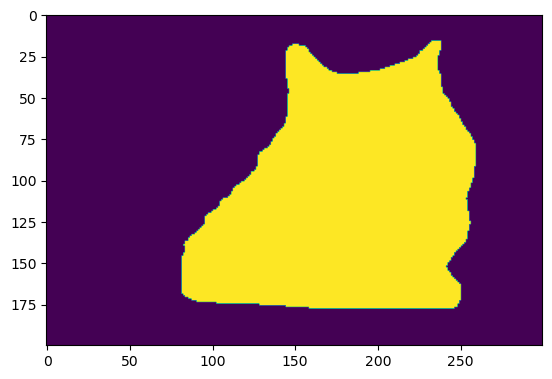

In [70]:
image = everything_results[0].masks.masks
plt.imshow(image)

In [ ]:
numpy_array = tensor.cpu().numpy()

In [ ]:
original_image = image
mask = masks[0]
binary_mask = mask #mask is already in 0's and 1's so no need to convert

original_image_rgba = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGBA) #to introduce

# Apply the mask to the alpha channel to make non-mask parts transparent
original_image_rgba[:, :, 3] = binary_mask * 255

# Display the image
plt.imshow(original_image_rgba)
plt.axis('off')
plt.savefig('cat.png', transparent=True)
plt.show()


In [43]:
image = cv2.imread('./raw-img/cat/3.jpeg')
image = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)


In [8]:
plt.imshow(image)
# plt.show()

In [7]:
plt.close()

In [16]:
%matplotlib inline

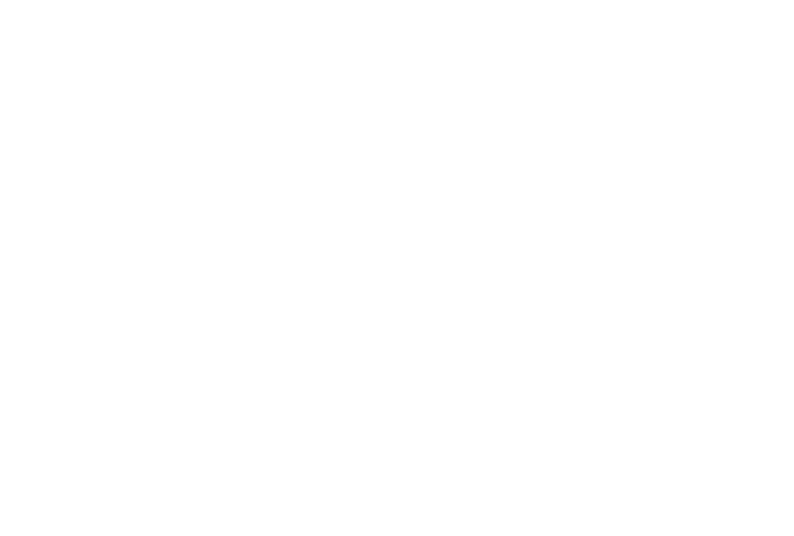

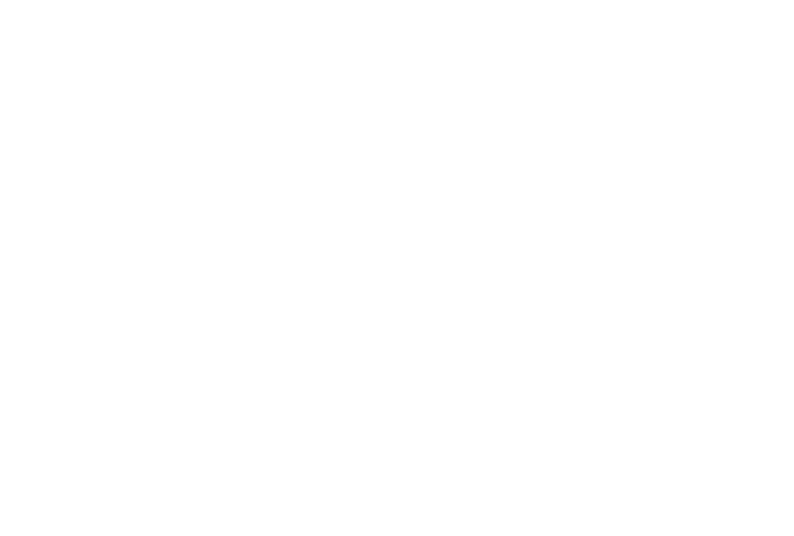

In [17]:

plt.imshow(image)
plt.show()